# MLP from scratch

This project is done by Mohammed Ali El Adlouni and is part of the Deep Learning course in the Master's program MALIA at Université Lyon 2.

In this project, the goal is to write the entire backpropagation algorithm from scratch using only Numerical Python package (numpy) and implement a simple multilayer perceptron (MLP). This will involve developing the necessary components for forward propagation, loss computation, and backpropagation to update the network's weights and biases effectively. We will also study the effect of some hyperparameters (learning rate, choice of activation function, etc) on the performance score and the elapsed time.

## Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from model import *
from utils import *

## Logic gates datasets

In [2]:
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_AND = np.array([[0], [0], [0], [1]])

X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_OR = np.array([[0], [1], [1], [1]])

X_XOR = np.array([[0,0], [0,1], [1,0], [1,1]])
y_XOR = np.array([[0], [0], [0], [1]])

X = X_XOR
y = y_XOR


## Training the neural network

In [3]:
nn = NeuralNetwork([2, 3, 1], activation_fct='leaky_relu', learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

losses = nn.train(X, y, return_loss='True')
print(f'train loss = {losses[-1]}')

test_loss, y_pred = nn.test(X, y, return_loss='True')
print(f'test loss: ', test_loss)

print(f'y_pred =', y_pred)


Epoch 0 : loss = 0.25640578275502984
train loss = 0.009767000646161724
test loss:  0.009495214248642461
y_pred = [[-1.09269832e-03  2.61830217e-01 -1.93166943e-04  9.13945249e-01]]


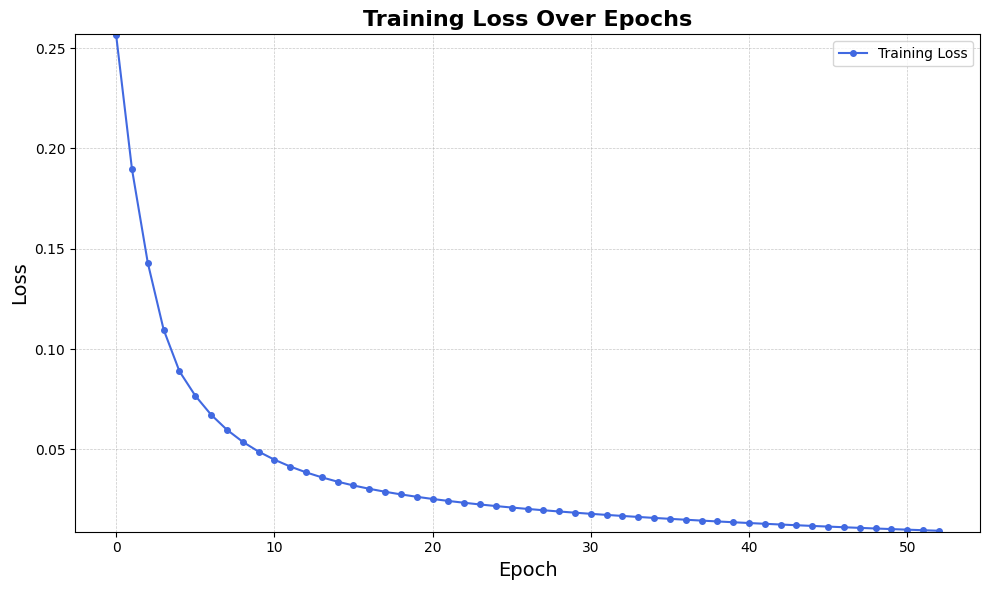

In [4]:
plot_training_loss(losses)

## Hyperparameter tuning 
### activation function

In [7]:
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
losses_dict = {}

# Dictionary to store predictions for each activation function
predictions = {}

for activation in activation_functions:
    # Initialize the neural network with the current activation function
    nn = NeuralNetwork([2, 3, 1], activation_fct=activation, learning_rate=0.01, loss_treshold=0.000001, max_iteration=5000)

    # Train the network and store the losses
    losses = nn.train(X, y, return_loss='True', verbose = False)
    losses_dict[activation] = losses  # Store losses in a dictionary

    # Print train loss and test results
    print(f'Training with {activation} activation function:')
    print(f'Train loss = {losses[-1]}')
    test_loss, y_pred = nn.test(X, y, return_loss='True')
    print(f'Test loss: ', test_loss)
    print(f'y_pred =', y_pred)
    print('-----------------------------------')

    # Store predictions in the dictionary
    predictions[activation] = y_pred.flatten()  # Flatten to 1D for easier printing


Training with sigmoid activation function:
Train loss = 0.006764447121085008
Test loss:  0.006759506345881864
y_pred = [[0.00471617 0.09974715 0.06708003 0.800991  ]]
-----------------------------------
Training with tanh activation function:
Train loss = 2.9063691852936645e-05
Test loss:  2.9046412559311203e-05
y_pred = [[-7.96092394e-04  7.92642157e-03  8.15330619e-03  9.89879082e-01]]
-----------------------------------
Training with relu activation function:
Train loss = 9.978380946249493e-07
Test loss:  9.898902601207404e-07
y_pred = [[0.         0.00162127 0.00150799 0.99826317]]
-----------------------------------
Training with leaky_relu activation function:
Train loss = 9.987300052936178e-07
Test loss:  9.949794655735147e-07
y_pred = [[-0.00180239  0.00130615  0.00116024  0.99871197]]
-----------------------------------


In [6]:
# Print predictions for each activation function
for activation, pred in predictions.items():
    print(f'y_pred for {activation}: {pred}')


y_pred for sigmoid: [0.00471617 0.09974715 0.06708003 0.800991  ]
y_pred for tanh: [-7.96092394e-04  7.92642157e-03  8.15330619e-03  9.89879082e-01]
y_pred for relu: [0.         0.00162127 0.00150799 0.99826317]
y_pred for leaky_relu: [-0.00180239  0.00130615  0.00116024  0.99871197]


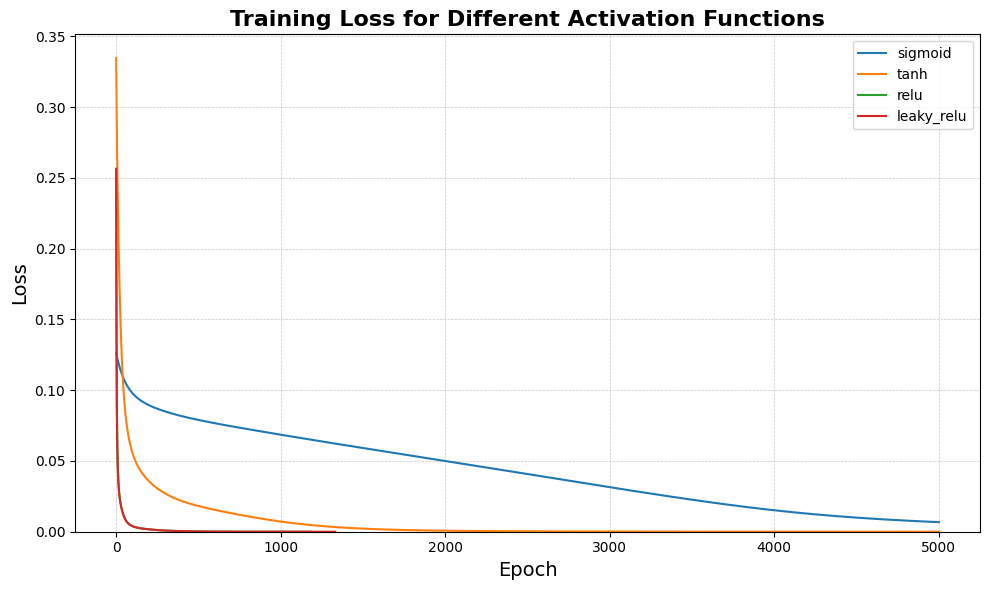

In [8]:
# Use the function to plot the training losses
plot_training_loss_tuning(losses_dict)


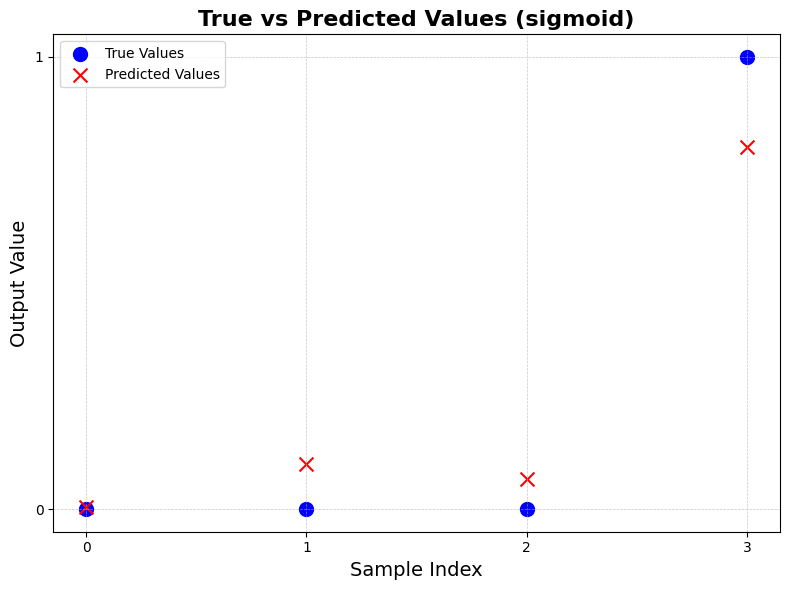

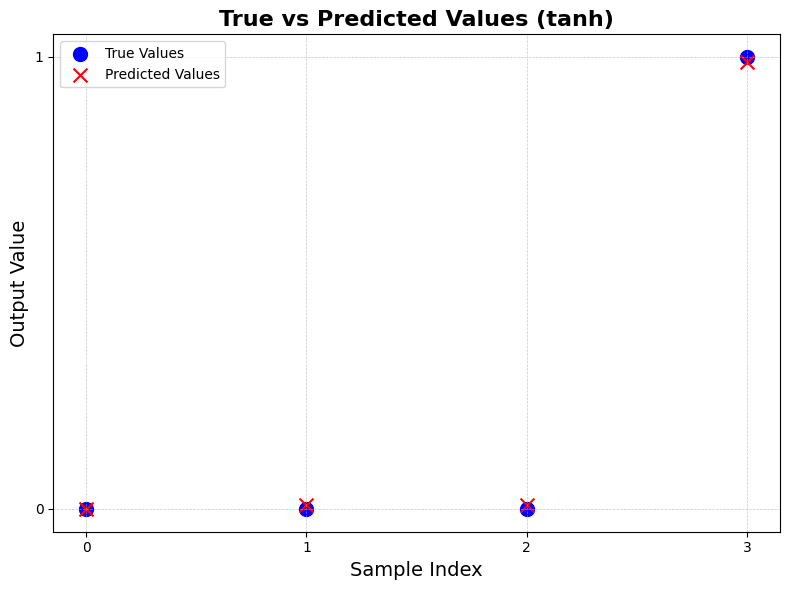

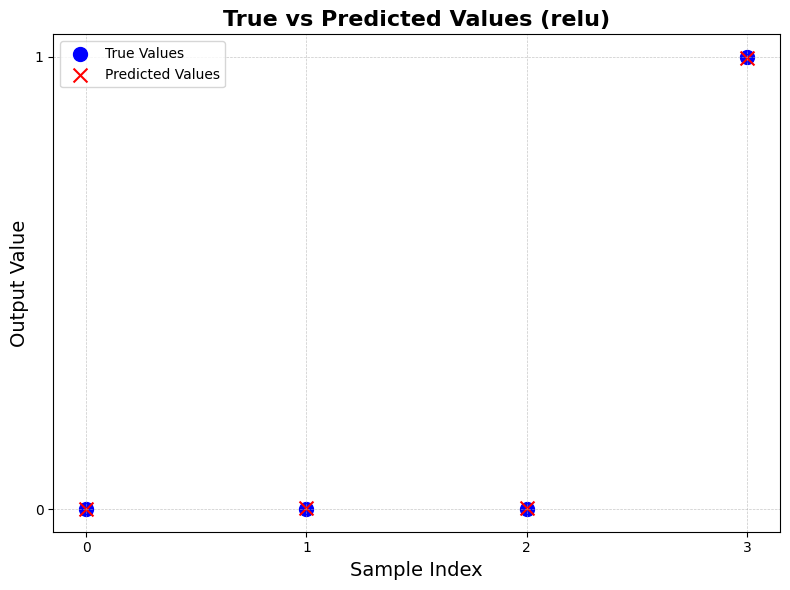

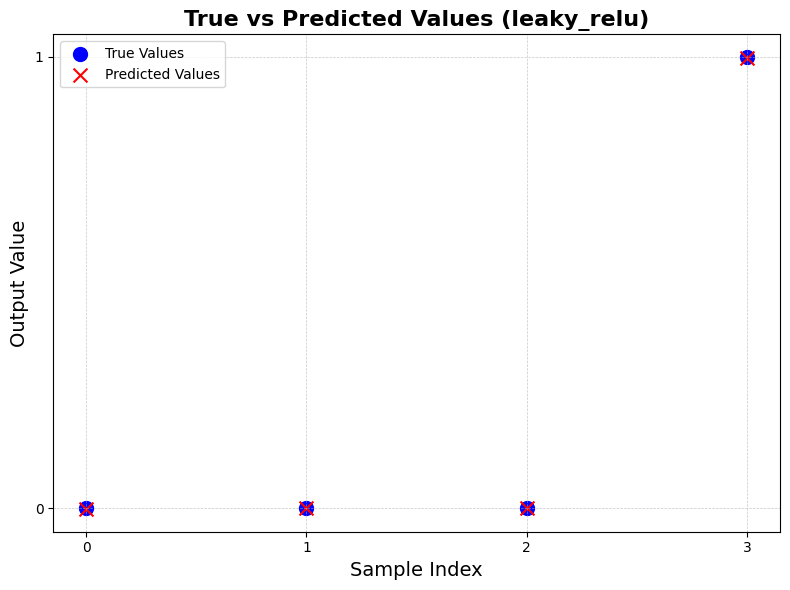

In [7]:
for activation, y_pred in predictions.items():
    plot_predictions(y, y_pred.T, activation)


### number of layers/ neurons per layer

Train loss for configuration (10,): 9.867132369905076e-07
Train loss for configuration (20, 20, 10): 9.993894069530461e-07
Train loss for configuration (3, 3): 0.0002675246356554681
Train loss for configuration (5, 5, 5, 5): 9.953284101600638e-07
Train loss for configuration (5, 3, 2): 9.848180661917623e-07


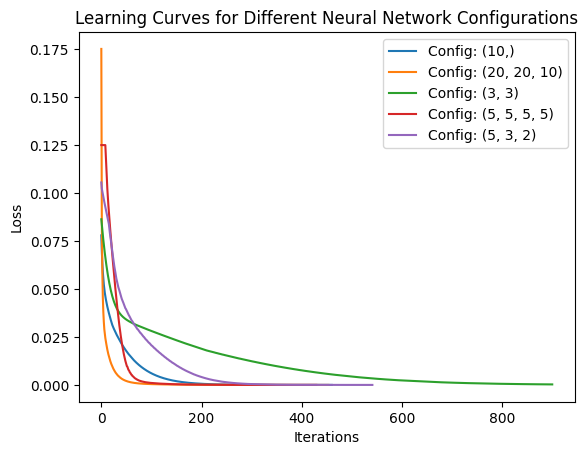

In [9]:
# Define ranges for the number of neurons and hidden layers
hidden_layer_configs = [(10,), (20, 20, 10), (3, 3), (5, 5, 5, 5), (5, 3, 2)]  

# Dictionary to store losses for each configuration
losses_dict = {}

for config in hidden_layer_configs:
    # Initialize the neural network with the current configuration
    nn = NeuralNetwork([2] + list(config) + [1], activation_fct='relu', learning_rate=0.01, loss_treshold=0.000001, max_iteration=900)

    # Train the neural network
    losses = nn.train(X_XOR, y_XOR, return_loss='True', verbose=False)
    print(f'Train loss for configuration {config}: {losses[-1]}')

    # Store losses for plotting
    losses_dict[config] = losses

# Plot learning curves for each configuration
for config, losses in losses_dict.items():
    plt.plot(losses, label=f'Config: {config}')

plt.title('Learning Curves for Different Neural Network Configurations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Conclusion


In this project, we successfully implemented a **Multilayer Perceptron (MLP)** from scratch using only NumPy, without relying on any high-level deep learning frameworks. This hands-on approach provided a solid foundation for understanding the internal mechanics of neural networks, covering:

- **Forward propagation** for generating predictions,
- **Loss computation** to measure prediction errors,
- **Backpropagation** for updating network parameters via gradient descent,
- And experimentation with different **activation functions** and **hyperparameters**.

We validated our model on basic logic gate datasets (AND, OR, XOR), with a particular focus on the XOR problem, which requires the model to capture non-linear relationships. Our MLP was able to learn this mapping effectively, demonstrating its expressive power.

We also conducted a comparative analysis of activation functions — **Sigmoid**, **Tanh**, **ReLU**, and **Leaky ReLU** — observing their influence on convergence speed and final loss through visualizations.

This project not only deepened our theoretical understanding but also enhanced our practical skills in neural network design and tuning. It provides a strong stepping stone for transitioning to more complex models and advanced frameworks in future deep learning work.
